<a href="https://colab.research.google.com/github/ConorMulholland/modelcomparisons/blob/main/ModelComparisonsCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline

import pandas as pd
import pandas.testing as tm
import itertools
import time
import statsmodels.api as sm
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.feature_selection import RFE 
from sklearn.preprocessing import scale 
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression, PLSSVD
from scipy.stats import sem
from matplotlib import pyplot

In [ ]:
df = pd.read_csv('BostonHousing.csv')
print(df.head())
df.info()

      crim    zn  indus  chas    nox  ...  tax  ptratio       b  lstat  medv
0  0.00632  18.0   2.31     0  0.538  ...  296     15.3  396.90   4.98  24.0
1  0.02731   0.0   7.07     0  0.469  ...  242     17.8  396.90   9.14  21.6
2  0.02729   0.0   7.07     0  0.469  ...  242     17.8  392.83   4.03  34.7
3  0.03237   0.0   2.18     0  0.458  ...  222     18.7  394.63   2.94  33.4
4  0.06905   0.0   2.18     0  0.458  ...  222     18.7  396.90   5.33  36.2

[5 rows x 14 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    

**Linear Regression**

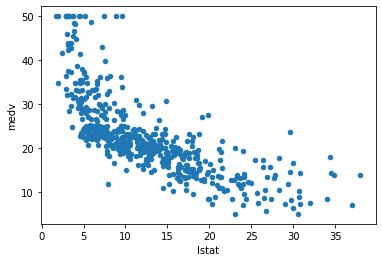

In [ ]:
df.plot.scatter("lstat","medv")

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.lstat, df.medv, test_size=0.2, random_state=0)

In [ ]:
regr = LinearRegression()


In [ ]:
regr.fit(np.array(x_train).reshape(-1,1), y_train)


LinearRegression()

In [ ]:
preds = regr.predict(np.array(x_test).reshape(-1,1))


In [ ]:
residuals = preds - y_test


(array([ 5.,  2.,  1.,  2.,  7., 12., 37., 23.,  9.,  4.]),
 array([-27.49964187, -23.05736047, -18.61507908, -14.17279768,
         -9.73051628,  -5.28823488,  -0.84595349,   3.59632791,
          8.03860931,  12.48089071,  16.9231721 ]),
 <a list of 10 Patch objects>)

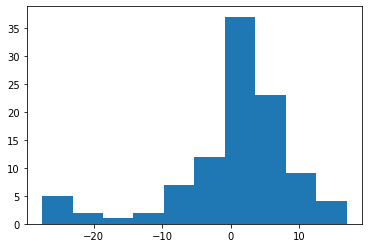

In [ ]:
plt.hist(residuals)


In [ ]:
mean_squared_error(y_test, preds) ** 0.5


9.019143423100997

**Forward and Backward Selection**

In [ ]:
print("Number of null values:", df["medv"].isnull().sum())

Number of null values: 0


In [ ]:
print("Dimensions of original data:", df.shape)
df_clean   = df.dropna()
print("Dimensions of modified data:", df_clean.shape)
print("Number of null values:", df_clean["medv"].isnull().sum())

Dimensions of original data: (506, 14)
Dimensions of modified data: (506, 14)
Number of null values: 0


In [ ]:
def processSubset(feature_set):
    # Fit model on feature_set and calculate RSS
    model = sm.OLS(y,X[list(feature_set)])
    regr = model.fit()
    RSS = ((regr.predict(X[list(feature_set)]) - y) ** 2).sum()
    return {"model":regr, "RSS":RSS}

In [ ]:
def getBest(k):
    
    tic = time.time()
    
    results = []
    
    for combo in itertools.combinations(X.columns, k):
        results.append(processSubset(combo))

    models = pd.DataFrame(results)
  
    best_model = models.loc[models['RSS'].argmin()]
    
    toc = time.time()
    print("Processed", models.shape[0], "models on", k, "predictors in", (toc-tic), "seconds.")
    
    return best_model

**Ridge Regression**


In [ ]:
alphas = 10**np.linspace(10,-2,100) *0.5
alphas

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+07, 1.07721735e+07, 8.14875417e+06,
       6.16423370e+06, 4.66301673e+06, 3.52740116e+06, 2.66834962e+06,
       2.01850863e+06, 1.52692775e+06, 1.15506485e+06, 8.73764200e+05,
       6.60970574e+05, 5.00000000e+05, 3.78231664e+05, 2.86118383e+05,
       2.16438064e+05, 1.63727458e+05, 1.23853818e+05, 9.36908711e+04,
       7.08737081e+04, 5.36133611e+04, 4.05565415e+04, 3.06795364e+04,
       2.32079442e+04, 1.75559587e+04, 1.32804389e+04, 1.00461650e+04,
       7.59955541e+03, 5.74878498e+03, 4.34874501e+03, 3.28966612e+03,
       2.48851178e+03, 1.88246790e+03, 1.42401793e+03, 1.07721735e+03,
      

In [ ]:
ridge = Ridge(normalize = True)
coefs = []

for a in alphas:
    ridge.set_params(alpha = a)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)
    
np.shape(coefs)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipel

(100, 14)

Text(0, 0.5, 'weights')

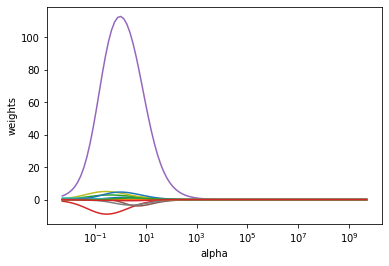

In [ ]:
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [ ]:
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)

In [ ]:
ridge2 = Ridge(alpha = 4, normalize = True)
ridge2.fit(X_train, y_train)             
pred2 = ridge2.predict(X_test)           
print(pd.Series(ridge2.coef_, index = X.columns)) 
print(mean_squared_error(y_test, pred2))   

crim        1.037543
zn         -0.048920
indus       1.944979
chas       -5.013056
nox        83.568959
rm         -3.369743
age         0.209289
dis        -3.354116
rad         2.184484
tax         0.127428
ptratio     4.081405
b          -0.074590
lstat       0.856847
medv       -0.597762
dtype: float64
9005.676693289213


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,


In [ ]:
ridge3 = Ridge(alpha = 10**10, normalize =True)
ridge3.fit(X_train, y_train)             
pred3 = ridge3.predict(X_test)           
print(pd.Series(ridge3.coef_, index = X.columns)) 
print(mean_squared_error(y_test, pred3)) 

crim       1.066303e-09
zn        -2.189888e-10
indus      1.931589e-09
chas      -2.193369e-09
nox        9.279672e-08
rm        -7.511162e-09
age        3.048066e-10
dis       -4.359230e-09
rad        1.775491e-09
tax        1.000000e-10
ptratio    3.990228e-09
b         -8.330423e-11
lstat      1.210813e-09
medv      -8.755795e-10
dtype: float64
27753.182463790006


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,


In [ ]:
ridge2 = Ridge(alpha = 0, normalize = True)
ridge2.fit(X_train, y_train)             
pred = ridge2.predict(X_test)           
print(pd.Series(ridge2.coef_, index = X.columns)) 
print(mean_squared_error(y_test, pred)) 

crim      -1.708707e-14
zn        -3.868941e-15
indus      6.045185e-14
chas       1.070545e-13
nox       -3.856766e-12
rm         5.127415e-14
age       -4.685862e-15
dis       -2.175902e-15
rad        3.045208e-14
tax        1.000000e+00
ptratio   -2.175856e-13
b          9.197703e-16
lstat     -1.426127e-14
medv      -3.813821e-14
dtype: float64
2.3539998541601203e-25


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,


In [ ]:
ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error', normalize = True)
ridgecv.fit(X_train, y_train)
ridgecv.alpha_

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), _RidgeGCV())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


0.005

In [ ]:
ridge4 = Ridge(alpha = ridgecv.alpha_, normalize = True)
ridge4.fit(X_train, y_train)
mean_squared_error(y_test, ridge4.predict(X_test))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,


14.689247286313803

In [ ]:
ridge4.fit(X, y)
pd.Series(ridge4.coef_, index = X.columns)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,


crim      -0.009232
zn         0.037306
indus      0.298554
chas      -0.958695
nox        2.228397
rm        -0.059583
age        0.004142
dis       -0.063255
rad        0.596923
tax        0.957196
ptratio    0.052759
b         -0.000222
lstat     -0.044530
medv      -0.071478
dtype: float64

**The Lasso**

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from skle

Text(0, 0.5, 'weights')

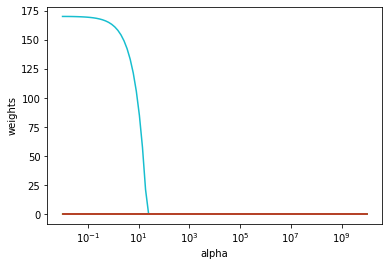

In [ ]:
lasso = Lasso(max_iter = 10000, normalize = True)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(scale(X_train), y_train)
    coefs.append(lasso.coef_)
    
ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [ ]:
lassocv = LassoCV(alphas = None, cv = 10, max_iter = 100000, normalize = True)
lassocv.fit(X_train, y_train)

lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_train, y_train)
mean_squared_error(y_test, lasso.predict(X_test))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from skle

0.02775318248998352

In [ ]:
pd.Series(lasso.coef_, index=X.columns)

crim       0.000
zn        -0.000
indus      0.000
chas      -0.000
nox        0.000
rm        -0.000
age        0.000
dis       -0.000
rad        0.000
tax        0.999
ptratio    0.000
b         -0.000
lstat      0.000
medv      -0.000
dtype: float64

**Elastic Net**

In [ ]:
from numpy import mean
from numpy import std
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import ElasticNet
from numpy import arange
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNetCV

In [ ]:
data = df.values
X, y = data[:, :-1], data[:, -1]
model = ElasticNet(alpha=1.0, l1_ratio=0.5)
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean MAE: 3.682 (0.530)


In [ ]:
X, y = data[:, :-1], data[:, -1]
model = ElasticNet()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
grid = dict()
grid['alpha'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0]
grid['l1_ratio'] = arange(0, 1, 0.01)
search = GridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
results = search.fit(X, y)
print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

MAE: -3.378
Config: {'alpha': 0.01, 'l1_ratio': 0.97}


In [ ]:
X, y = data[:, :-1], data[:, -1]
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
ratios = arange(0.1, 1, 0.01)
alphas = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.5, 1.0, 10.0, 100.0]
model = ElasticNetCV(l1_ratio=ratios, alphas=alphas, cv=cv, n_jobs=-1)
model.fit(X, y)
print('alpha: %f' % model.alpha_)
print('l1_ratio_: %f' % model.l1_ratio_)

alpha: 0.000010
l1_ratio_: 0.300000


**Principle Components regression**

In [ ]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression, PLSSVD
from sklearn.metrics import mean_squared_error

In [ ]:
pca = PCA() 
X_reduced = pca.fit_transform(scale(X))
pd.DataFrame(pca.components_.T)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.250951,-0.315252,0.246566,0.061771,0.082157,-0.219660,0.777607,0.153350,0.260390,0.019369,-0.109644,0.086761,0.045952
1,-0.256315,-0.323313,0.295858,0.128712,0.320617,-0.323388,-0.274996,-0.402680,0.358137,0.267527,0.262756,-0.071425,-0.080919
2,0.346672,0.112493,-0.015946,0.017146,-0.007811,-0.076138,-0.339576,0.173932,0.644416,-0.363532,-0.303169,-0.113200,-0.251077
3,0.005042,0.454829,0.289781,0.815941,0.086531,0.167490,0.074136,-0.024662,-0.013728,-0.006182,0.013927,-0.003983,0.035922
4,0.342852,0.219116,0.120964,-0.128226,0.136854,-0.152983,-0.199635,0.080121,-0.018522,0.231056,0.111319,0.804323,0.043630
5,-0.189243,0.149332,0.593961,-0.280592,-0.423447,0.059267,0.063940,-0.326752,0.047898,-0.431420,0.053162,0.152873,0.045567
6,0.313671,0.311978,-0.017675,-0.175206,0.016691,-0.071709,0.116011,-0.600823,-0.067562,0.362779,-0.459159,-0.211936,-0.038551
7,-0.321544,-0.349070,-0.049736,0.215436,0.098592,0.023439,-0.103900,-0.121812,-0.153291,-0.171213,-0.695693,0.390941,-0.018299
8,0.319793,-0.271521,0.287255,0.132350,-0.204132,-0.143194,-0.137943,0.080358,-0.470891,0.021909,0.036544,-0.107026,-0.633490
9,0.338469,-0.239454,0.220744,0.103335,-0.130461,-0.192934,-0.314887,0.082774,-0.176563,-0.035168,-0.104836,-0.215191,0.720233


In [ ]:
expLianedVariance=(pca.explained_variance_/pca.explained_variance_.sum())*100
expLianedVarianceCum=expLianedVariance.cumsum()
pd.DataFrame( expLianedVarianceCum, expLianedVariance)

,0
47.129606,47.129606
11.025193,58.154800
9.558590,67.713389
6.596732,74.310121
6.421661,80.731782
5.056978,85.788760
4.118124,89.906884
3.046902,92.953786
2.130333,95.084120
1.694137,96.778257


In [ ]:
expLianedVariance.size

13

(0.0, 20.0)

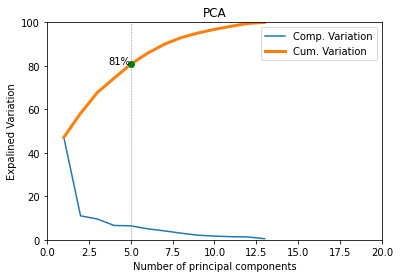

In [ ]:
xlabel=range(1, expLianedVariance.size+1)
xlabel=np.reshape( np.asarray(list(xlabel)), (13,))
N_PC_sel=5
variance_N_PC= expLianedVarianceCum[N_PC_sel-1]
plt.figure( )

plt.plot(list(xlabel),expLianedVariance, label='Comp. Variation')
plt.plot(list(xlabel),expLianedVarianceCum, label = 'Cum. Variation', linewidth=3)
plt.axvline(x=N_PC_sel, linestyle='dashed',linewidth=.5, color='grey')
plt.plot(N_PC_sel,variance_N_PC, color='green', marker='o')
plt.text(N_PC_sel,variance_N_PC,"{0:.0%}".format(variance_N_PC/100.0), horizontalalignment='right')

plt.legend()
plt.title('PCA')
plt.xlabel('Number of principal components')
plt.ylabel('Expalined Variation')
plt.ylim([0,100])
plt.xlim([0,20])

In [ ]:
pd.DataFrame(pca.components_.T).loc[:4,:5]

,0,1,2,3,4,5
0,0.250951,-0.315252,0.246566,0.061771,0.082157,-0.219660
1,-0.256315,-0.323313,0.295858,0.128712,0.320617,-0.323388
2,0.346672,0.112493,-0.015946,0.017146,-0.007811,-0.076138
3,0.005042,0.454829,0.289781,0.815941,0.086531,0.167490
4,0.342852,0.219116,0.120964,-0.128226,0.136854,-0.152983


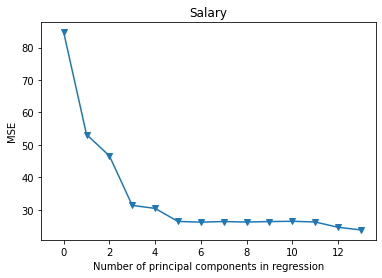

In [ ]:
# 10-fold CV, with shuffle
from sklearn.model_selection import KFold
n = len(X_reduced)
kf_10 = KFold( n_splits=10, shuffle=True, random_state=1)

regr = LinearRegression()
mse = []

score = -1*cross_val_score(regr, np.ones((n,1)), y.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()    
mse.append(score)

for i in np.arange(1, 14):
    score = -1*cross_val_score(regr, X_reduced[:,:i], y.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(score)

plt.plot(mse, '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.title('Salary')
plt.xlim(xmin=-1);

In [ ]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([ 47.13,  58.16,  67.72,  74.32,  80.74,  85.8 ,  89.92,  92.97,
        95.1 ,  96.79,  98.22,  99.52, 100.01])

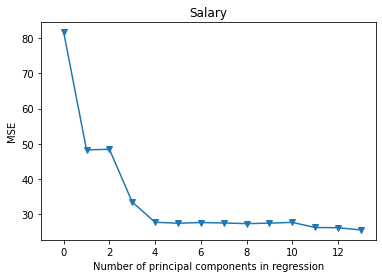

In [ ]:
pca2 = PCA()

X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)

X_reduced_train = pca2.fit_transform(scale(X_train))
n = len(X_reduced_train)

kf_10 = KFold( n_splits=10, shuffle=True, random_state=1)

mse = []

score = -1*cross_val_score(regr, np.ones((n,1)), y_train.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()    
mse.append(score)

for i in np.arange(1, 14):
    score = -1*cross_val_score(regr, X_reduced_train[:,:i], y_train.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(score)

plt.plot(np.array(mse), '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.title('Salary')
plt.xlim(xmin=-1);

In [ ]:
X_reduced_test = pca2.transform(scale(X_test))[:,:7]

# Train regression model on training data 
regr = LinearRegression()
regr.fit(X_reduced_train[:,:7], y_train)

# Prediction with test data
pred = regr.predict(X_reduced_test)
mean_squared_error(y_test, pred)

26.46689369324477

**Partial Least Squares**

(-1.0, 13.6)

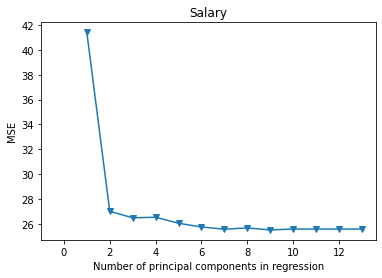

In [ ]:
n = len(X_train)

kf_10 = KFold(n_splits=10, shuffle=True, random_state=1)

mse = []

for i in np.arange(1, 14):
    pls = PLSRegression(n_components=i)
    score = cross_val_score(pls, scale(X_train), y_train, cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(-score)

plt.plot(np.arange(1, 14), np.array(mse), '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.title('Salary')
plt.xlim(xmin=-1)

In [ ]:
pls = PLSRegression(n_components=2)
pls.fit(scale(X_train), y_train)

mean_squared_error(y_test, pls.predict(scale(X_test)))

24.962884805000265

**X Validation**

In [ ]:
print(df)

        crim    zn  indus  chas    nox  ...  tax  ptratio       b  lstat  medv
0    0.00632  18.0   2.31     0  0.538  ...  296     15.3  396.90   4.98  24.0
1    0.02731   0.0   7.07     0  0.469  ...  242     17.8  396.90   9.14  21.6
2    0.02729   0.0   7.07     0  0.469  ...  242     17.8  392.83   4.03  34.7
3    0.03237   0.0   2.18     0  0.458  ...  222     18.7  394.63   2.94  33.4
4    0.06905   0.0   2.18     0  0.458  ...  222     18.7  396.90   5.33  36.2
..       ...   ...    ...   ...    ...  ...  ...      ...     ...    ...   ...
501  0.06263   0.0  11.93     0  0.573  ...  273     21.0  391.99   9.67  22.4
502  0.04527   0.0  11.93     0  0.573  ...  273     21.0  396.90   9.08  20.6
503  0.06076   0.0  11.93     0  0.573  ...  273     21.0  396.90   5.64  23.9
504  0.10959   0.0  11.93     0  0.573  ...  273     21.0  393.45   6.48  22.0
505  0.04741   0.0  11.93     0  0.573  ...  273     21.0  396.90   7.88  11.9

[506 rows x 14 columns]


In [ ]:
y = df.medv

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(404, 14) (404,)
(102, 14) (102,)


In [ ]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

In [ ]:
print(predictions[0:5])
print(y_test[0:5])

Text(0, 0.5, 'Predictions')

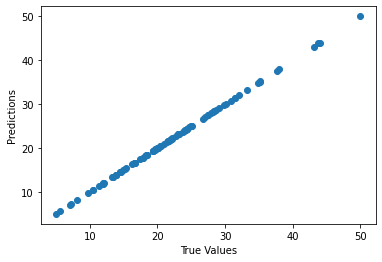

In [ ]:
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [ ]:
print ("Score:", model.score(X_test, y_test))

Score: 1.0


In [ ]:
X = df
y = df.medv
cv = KFold(n_splits=10, random_state=1, shuffle=True)
model = linear_model.LinearRegression()
scores = cross_val_score(model, X, y , cv=cv, n_jobs=-1)
print('Score: %.3f (%.3f)' % (mean(scores), std(scores)))

Score: 1.000 (0.000)


In [ ]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
model = linear_model.LinearRegression()
scores = cross_val_score(model, X, y, cv=cv, n_jobs=-1)
print('Score: %.3f (%.3f)' % (mean(scores), std(scores)))

Score: 1.000 (0.000)


-1 mean=1.0000 se=0.000
-2 mean=1.0000 se=0.000
-3 mean=1.0000 se=0.000
-4 mean=1.0000 se=0.000
-5 mean=1.0000 se=0.000
-6 mean=1.0000 se=0.000
-7 mean=1.0000 se=0.000
-8 mean=1.0000 se=0.000
-9 mean=1.0000 se=0.000
-10 mean=1.0000 se=0.000
-11 mean=1.0000 se=0.000
-12 mean=1.0000 se=0.000
-13 mean=1.0000 se=0.000
-14 mean=1.0000 se=0.000
-15 mean=1.0000 se=0.000
-16 mean=1.0000 se=0.000
-17 mean=1.0000 se=0.000
-18 mean=1.0000 se=0.000
-19 mean=1.0000 se=0.000
-20 mean=1.0000 se=0.000
-21 mean=1.0000 se=0.000
-22 mean=1.0000 se=0.000
-23 mean=1.0000 se=0.000
-24 mean=1.0000 se=0.000
-25 mean=1.0000 se=0.000
-26 mean=1.0000 se=0.000
-27 mean=1.0000 se=0.000
-28 mean=1.0000 se=0.000
-29 mean=1.0000 se=0.000


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


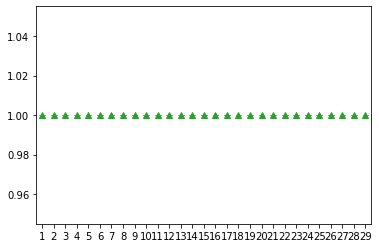

In [ ]:
def evaluate_model(X, y, repeats):
	cv = RepeatedKFold(n_splits=10, n_repeats=repeats, random_state=1)
	model = linear_model.LinearRegression()
	scores = cross_val_score(model, X, y,  cv=cv, n_jobs=-1)
	return scores

X = df 
y = df.medv 

repeats = range(1,30)
results = list()
for r in repeats:
	
	scores = evaluate_model(X, y, r)
	print('-%d mean=%.4f se=%.3f' % (r, mean(scores), sem(scores)))
	
	results.append(scores)
pyplot.boxplot(results, labels=[str(r) for r in repeats], showmeans=True)
pyplot.show()